In [15]:
!pip3 install pandas
!pip3 install geopandas

In [67]:
import pandas as pd
import os
import geopandas as gpd
from os.path import join

def createEpisodes(csv_path):
    #Reads csv and store in data frame
    df = pd.read_csv(csv_path)
    dirName = 'Episodes'

    # Create target Directory
    try: 
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ") 
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")


    #Gets all unique ids from csv
    id = df['id'].unique()

    #Create csv for each unique set of ids and their corresponding rows 
    for i in id:
        idframe =  df[df["id"] == i]
        idframe= idframe[["id","lat","lon","time"]]
        idframe = idframe.dropna()
        idframe.to_csv("./Episodes/ID_"+str(i)+"_Episode.csv", index=False)
 

#This function receives a directory and returns an array of all files
#within the directory, full file paths
def readDir(inputpath):
    #use list comprehension to list all of the files in a directory
    #I use absolute filepaths for clarity and continuity within code
    return [os.path.join(inputpath, file) for file in os.listdir(inputpath)]


#try to create SHP files directory
targetPath = "SHPfiles"
try:     
    os.mkdir(targetPath)
except FileExistsError:
    pass
    
#The function receives an array of csv episode filepaths and 
#returns a directory with the corresponding point shapefiles 
def convertCSVtoSHP(filenames):
    #Loops through each csvfile, creates point SHP file and writes to the new directory
    for csvfile in range(len(filenames)):

        #reading the csv file that nicholas created to a pandas dataframe
        data = pd.read_csv(filenames[csvfile])

        #creating a Geodataframe from the past dataframe
        dataGDF = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data['lon'], data['lat']))

        #Standardized ESRI wkt projection
        #https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/coordinate-systems-difference/
        ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]'

        #creating the unique filename for the shp file
        filename = os.path.basename(filenames[csvfile])
        shpfilename = filename[:len(filename)-3] + "shp"

        #writing to a SHP from the GeoDataframe
        dataGDF.to_file(filename="./SHPfiles/"+shpfilename, driver = 'ESRI Shapefile', crs=ESRI_WKT)

    #outputs the path to the shapefiles
    return targetPath


In [68]:
createEpisodes('../stops.txt')

Directory  Episodes  Created 


In [69]:
inputarray = readDir("Episodes/")
convertCSVtoSHP(inputarray)

'SHPfiles'

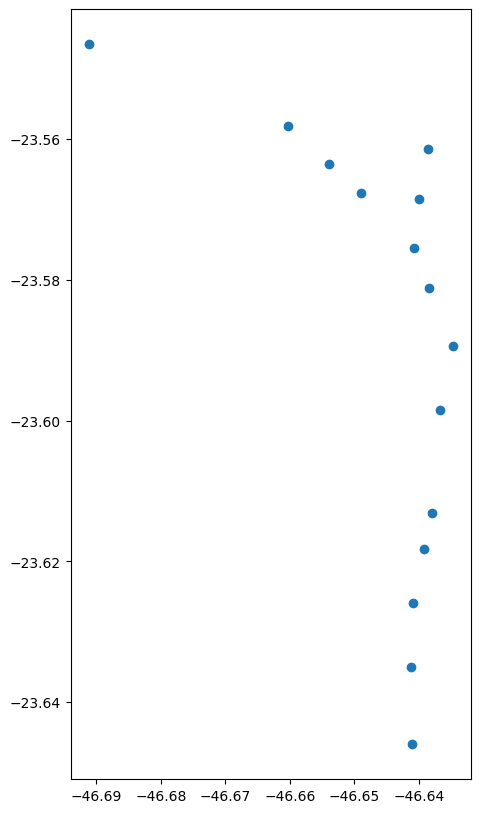

In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

for i in readDir("SHPfiles/"):
    if (".shp" in i):
        shapefile = gpd.read_file(i)
        shapefile.plot(ax=ax)
        break

In [71]:
# Load a map with data and config and height
from keplergl import KeplerGl
map_2 = KeplerGl()
for i in readDir("SHPfiles/"):
    if (".shp" in i):
        filename = "data"+ i
        map_2.add_data(data=gpd.read_file(i), name=filename)
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'dataSHPfiles/ID_18848_Episode.shp': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

In [66]:
!rm -r SHPfiles
!rm -r Episodes